<a href="https://colab.research.google.com/github/Juliana-flores/AnalisePlaylistRock/blob/main/An%C3%A1lise_de_m%C3%BAsicas_de_Rock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

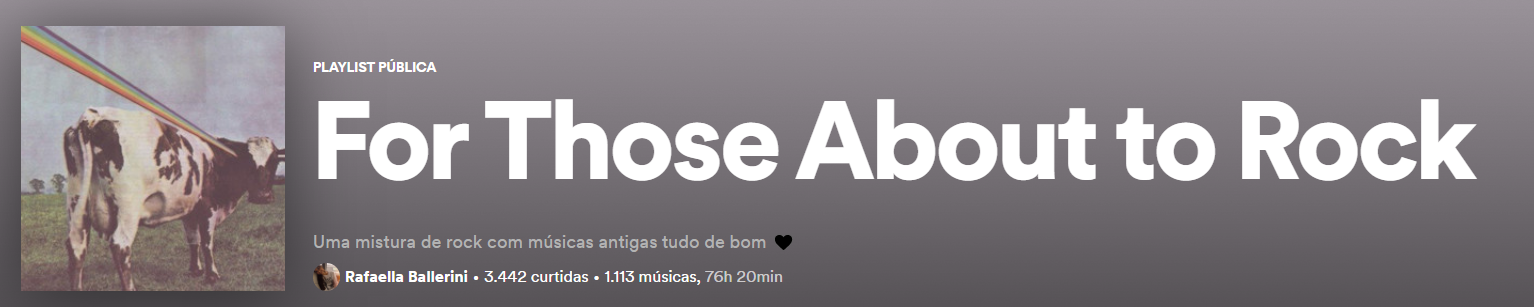

# An√°lise da hist√≥ria do rock por meio de uma playlist üé∏

Uma associa√ß√£o de como o rock foi se modificando desde a d√©cada de 50 at√© os dias de hoje e como isso pode ser observado na pr√°tica nas m√∫sicas presentes em uma playlist de rock do Spotify.

## Tecnologias utilizadas no trabalho:

1. üêº **Pandas:** manipula√ß√£o do dataset
2. üìä **MatPlotLib + Seaborn:** an√°lise gr√°fica
3. üßÆ **Numpy:** c√°lculos e manipula√ß√£o de arrays
4. üìê **Scipy:** para normaliza√ß√£o de dados
5. üé∂ **Spotipy:** para consumirmos a API do Spotify e obtermos dados da playlist
6. üìã **CSV:** para criar um novo CSV a partir dos dados da API
7. üóìÔ∏è **Datetime:** manipular datas
8. üí¨ **Wordcloud:** an√°lise de palavras mais frequentes




---



## 1. Instala√ß√£o e importa√ß√£o de bibliotecas:

In [ ]:
!pip install spotipy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm, skew
from wordcloud import WordCloud



---



## 2. Credenciais:

In [ ]:
spotify_details = {
    'client_id' : 'seu_client_id',
    'client_secret':'seu_client_secret',
    'redirect_uri':'https://beacons.ai/rafaballerini'}

In [ ]:
try:
  sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'],
          client_secret=spotify_details['client_secret'],
          redirect_uri=spotify_details['redirect_uri'], open_browser=False))
except:
  print('Token is not accesible')

Todas essas informa√ß√µes voc√™ pode obter por meio do Spotify para desenvolvedores, [nesse link](https://developer.spotify.com/), criando uma nova aplia√ß√£o e a configurando

A **redirect URI** √© o local para o qual o servidor de autoriza√ß√£o enviar√° para n√≥s quando o aplicativo for autorizado e receber um c√≥digo de autoriza√ß√£o ou token de acesso, voc√™ pode escolher a que quiser e configurar l√° na sua aplica√ß√£o do Spotify para Dev



---



## 3. Importando dados da playlist "For Those About to Rock":

In [ ]:
rock_playlist = sp.playlist_tracks('https://open.spotify.com/playlist/5TUxgTIxzLbLVh7RUf9V8i?si=da9e921dc4c3416d')

tracks = rock_playlist['items']
while rock_playlist['next']:
        rock_playlist = sp.next(rock_playlist)
        tracks.extend(rock_playlist['items'])

Voc√™ pode utilizar tanto o ID da playlist, quando a sua URL



---



## 4. Transformando os dados das m√∫sicas em CSV:

In [ ]:
audio_features = []
decadas = []

# d√©cada de 50
inicio_decada_50 = datetime.datetime(1950, 1, 1)
fim_decada_50 = datetime.datetime(1959, 12, 31)

# d√©cada de 60
inicio_decada_60 = datetime.datetime(1960, 1, 1)
fim_decada_60 = datetime.datetime(1969, 12, 31)

# d√©cada de 70
inicio_decada_70 = datetime.datetime(1970, 1, 1)
fim_decada_70 = datetime.datetime(1979, 12, 31)

# d√©cada de 80
inicio_decada_80 = datetime.datetime(1980, 1, 1)
fim_decada_80 = datetime.datetime(1989, 12, 31)

# d√©cada de 90
inicio_decada_90 = datetime.datetime(1990, 1, 1)
fim_decada_90 = datetime.datetime(1999, 12, 31)

# d√©cada de 2000
inicio_decada_2000 = datetime.datetime(2000, 1, 1)
fim_decada_2000 = datetime.datetime(2022, 12, 31)

def definir_decada(ano):
  if (musicas['track']['album']['release_date'] >= inicio_decada_50) and (musicas['track']['album']['release_date'] <= fim_decada_50):
      return 1950
  elif (musicas['track']['album']['release_date'] >= inicio_decada_60) and (musicas['track']['album']['release_date'] <= fim_decada_60):
      return 1960
  elif (musicas['track']['album']['release_date'] >= inicio_decada_70) and (musicas['track']['album']['release_date'] <= fim_decada_70):
      return 1970
  elif (musicas['track']['album']['release_date'] >= inicio_decada_80) and (musicas['track']['album']['release_date'] <= fim_decada_80):
      return 1980
  elif (musicas['track']['album']['release_date'] >= inicio_decada_90) and (musicas['track']['album']['release_date'] <= fim_decada_90):
      return 1990
  elif (musicas['track']['album']['release_date'] >= inicio_decada_2000) and (musicas['track']['album']['release_date'] <= fim_decada_2000):
      return 2000

# criando novo arquivo CSV e cabe√ßalho
with open('musicas.csv', mode = 'w') as csvfile:
  csv.writer(csvfile, delimiter=',').writerow([
        'Nome da m√∫sica',
        'Nome do artista',
        '√Ålbum',
        'Data de lan√ßamento do √°lbum',
        'Qtd m√∫sicas no √°lbum',
        'Dura√ß√£o em min',
        'Conte√∫do expl√≠cito',
        'Preview da m√∫sica',
        'Energia',
        'Ao vivo',
        'Ac√∫stica',
        'Instrumental',
        'Dan√ßabilidade',
        'Volume',
        'D√©cada'

  ])

  for musicas in tracks:

    audio_features = sp.audio_features(musicas['track']['id'])

    # obter informa√ß√µes detalhadas de √°udio da m√∫sica
    nomes_artistas = str({artista['name'] for artista in musicas['track']['artists']})
    energia = str({audio['energy'] for audio in audio_features})
    vivacidade = str({audio['liveness'] for audio in audio_features})
    acustica = str({audio['acousticness'] for audio in audio_features})
    instrumental = str({audio['instrumentalness'] for audio in audio_features})
    danca = str({audio['danceability'] for audio in audio_features})
    volume = str({audio['loudness'] for audio in audio_features})

    # remover caracteres especiais
    caracteres = '{"}'
    for i in range(0,len(caracteres)):
      nomes_artistas = nomes_artistas.replace(caracteres[i],"")
      energia = energia.replace(caracteres[i],"")
      vivacidade = vivacidade.replace(caracteres[i],"")
      acustica = acustica.replace(caracteres[i],"")
      instrumental = instrumental.replace(caracteres[i],"")
      danca = danca.replace(caracteres[i],"")
      volume = volume.replace(caracteres[i],"")

    # cria√ß√£o da coluna de d√©cada
    musicas['track']['album']['release_date'] = pd.to_datetime(musicas['track']['album']['release_date'])
    decada =  definir_decada(musicas['track']['album']['release_date'])   

    # escrever dados no csv
    csv.writer(csvfile, delimiter=',').writerow([
            musicas['track']['name'],
            nomes_artistas,
            musicas['track']['album']['name'], 
            musicas['track']['album']['release_date'],
            musicas['track']['album']['total_tracks'],
            musicas['track']['duration_ms'] / 60000,
            musicas['track']['explicit'],
            musicas['track']['preview_url'],
            energia,
            vivacidade,
            acustica,
            instrumental,
            danca,
            volume,
            decada
    ])

    musicas['track']['album']['release_date']

Voc√™ pode conferir [aqui](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) a documenta√ß√£o da API do Spotify para compreender melhor o que significa cada uma das features


### **Informa√ß√µes obtidas:**
* **Nome da m√∫sica**
* **Nome do artista**
* **√Ålbum**
* **Data de lan√ßamento do √°lbum**
* **Qtd m√∫sicas no √°lbum**
* **Dura√ß√£o em min**
* **Conte√∫do expl√≠cito:** se tem conte√∫do +18, inadequado para crian√ßas
* **Preview da m√∫sica:** link para ouvir gratuitamente 29s da m√∫sica
* **Energia:** intensidade da m√∫sica
* **Ao vivo:** probabilidade de a m√∫sica ter sido gravada complateia
* **Ac√∫stica:** probabilidade de a m√∫sica ter sido gravada no formato ac√∫stico
* **Instrumental:** probabilidade de a m√∫sica ser apenas instrumental (woah wah, esse tipo de coisa n√£o conta como letra)
* **Dan√ßabilidade:** o quanto a m√∫sica te faz querer levantar e dan√ßar
* **Volume**
* **D√©cada**



---



## 5. Leitura de dados CSV:

In [ ]:
df = pd.read_csv('musicas.csv')
print('N√∫mero de m√∫sicas:', len(df.index))
df.head()

N√∫mero de m√∫sicas: 1113


Nome da m√∫sica Nome do artista                     √Ålbum  \
0        Sweet Child O' Mine   Guns N' Roses  Appetite For Destruction   
1      Welcome To The Jungle   Guns N' Roses  Appetite For Destruction   
2              Paradise City   Guns N' Roses  Appetite For Destruction   
3              November Rain   Guns N' Roses       Use Your Illusion I   
4  Knockin' On Heaven's Door   Guns N' Roses      Use Your Illusion II   

  Data de lan√ßamento do √°lbum  Qtd m√∫sicas no √°lbum  Dura√ß√£o em min  \
0         1987-07-21 00:00:00                    12        5.908667   
1         1987-07-21 00:00:00                    12        4.533767   
2         1987-07-21 00:00:00                    12        6.760667   
3         1991-09-17 00:00:00                    16        8.958433   
4         1991-09-18 00:00:00                    14        5.600000   

   Conte√∫do expl√≠cito                                  Preview da m√∫sica  \
0                True  https://p.scdn.co/mp3-preview/26f96fc55eb99fff...   
1                True  https://p.scdn.co/mp3-preview/ba0aab328e995e5e...   
2                True  https://p.scdn.co/mp3-preview/7ae84c42f57bf69c...   
3               False                                                NaN   
4               False                                                NaN   

   Energia  Ao vivo  Ac√∫stica  Instrumental  Dan√ßabilidade  Volume  D√©cada  
0    0.910   0.1160    0.0866       0.09960          0.454  -7.766    1980  
1    0.954   0.2980    0.0235       0.40300          0.447  -8.069    1980  
2    0.952   0.1420    0.0169       0.01110          0.273  -8.762    1980  
3    0.629   0.1250    0.0165       0.27900          0.197  -9.291    1990  
4    0.747   0.0992    0.0203       0.00607          0.486  -7.248    1990



---



## 6. An√°lise dos dados:

1. Verificando dados ausentes

In [ ]:
df_ausentes = df.isnull().sum()
df_ausentes

Nome da m√∫sica                   0
Nome do artista                  0
√Ålbum                            0
Data de lan√ßamento do √°lbum      0
Qtd m√∫sicas no √°lbum             0
Dura√ß√£o em min                   0
Conte√∫do expl√≠cito               0
Preview da m√∫sica              362
Energia                          0
Ao vivo                          0
Ac√∫stica                         0
Instrumental                     0
Dan√ßabilidade                    0
Volume                           0
D√©cada                           0
dtype: int64

Apenas a coluna de `Preview da m√∫sica` est√° com dados no formato de `NaN`, por√©m isso significa que n√£o h√° informa√ß√µes sobre isso, ent√£o trocaremos todos por `none`

2. Transformando `NaN` em  `None`

In [ ]:
for col in ('Preview da m√∫sica',):
  df[col] = df[col].fillna('None')
df.head()

Nome da m√∫sica Nome do artista                     √Ålbum  \
0        Sweet Child O' Mine   Guns N' Roses  Appetite For Destruction   
1      Welcome To The Jungle   Guns N' Roses  Appetite For Destruction   
2              Paradise City   Guns N' Roses  Appetite For Destruction   
3              November Rain   Guns N' Roses       Use Your Illusion I   
4  Knockin' On Heaven's Door   Guns N' Roses      Use Your Illusion II   

  Data de lan√ßamento do √°lbum  Qtd m√∫sicas no √°lbum  Dura√ß√£o em min  \
0         1987-07-21 00:00:00                    12        5.908667   
1         1987-07-21 00:00:00                    12        4.533767   
2         1987-07-21 00:00:00                    12        6.760667   
3         1991-09-17 00:00:00                    16        8.958433   
4         1991-09-18 00:00:00                    14        5.600000   

   Conte√∫do expl√≠cito                                  Preview da m√∫sica  \
0                True  https://p.scdn.co/mp3-preview/26f96fc55eb99fff...   
1                True  https://p.scdn.co/mp3-preview/ba0aab328e995e5e...   
2                True  https://p.scdn.co/mp3-preview/7ae84c42f57bf69c...   
3               False                                               None   
4               False                                               None   

   Energia  Ao vivo  Ac√∫stica  Instrumental  Dan√ßabilidade  Volume  D√©cada  
0    0.910   0.1160    0.0866       0.09960          0.454  -7.766    1980  
1    0.954   0.2980    0.0235       0.40300          0.447  -8.069    1980  
2    0.952   0.1420    0.0169       0.01110          0.273  -8.762    1980  
3    0.629   0.1250    0.0165       0.27900          0.197  -9.291    1990  
4    0.747   0.0992    0.0203       0.00607          0.486  -7.248    1990

3. An√°lise das features num√©ricas

In [ ]:
numericas = df.select_dtypes(include = [np.number])
numericas.columns

Index(['Qtd m√∫sicas no √°lbum', 'Dura√ß√£o em min', 'Energia', 'Ao vivo',
       'Ac√∫stica', 'Instrumental', 'Dan√ßabilidade', 'Volume', 'D√©cada'],
      dtype='object')

In [ ]:
df.describe()

Qtd m√∫sicas no √°lbum  Dura√ß√£o em min      Energia      Ao vivo  \
count           1113.000000     1113.000000  1113.000000  1113.000000   
mean              16.964061        4.115259     0.728167     0.203700   
std               13.664813        1.434273     0.198368     0.174148   
min                1.000000        1.088567     0.019500     0.012000   
25%               11.000000        3.222000     0.599000     0.090500   
50%               13.000000        3.925767     0.780000     0.136000   
75%               18.000000        4.731200     0.890000     0.271000   
max              186.000000       17.088000     0.992000     0.990000   

          Ac√∫stica  Instrumental  Dan√ßabilidade       Volume       D√©cada  
count  1113.000000   1113.000000    1113.000000  1113.000000  1113.000000  
mean      0.157142      0.051396       0.504341    -7.561604  1985.220126  
std       0.224668      0.156374       0.136852     3.440227    13.747827  
min       0.000003      0.000000       0.149000   -33.350000  1950.000000  
25%       0.005390      0.000002       0.410000    -9.379000  1970.000000  
50%       0.048500      0.000134       0.508000    -7.021000  1990.000000  
75%       0.212000      0.006890       0.597000    -5.066000  2000.000000  
max       0.947000      0.936000       0.942000    -1.108000  2000.000000

4. An√°lise das features categ√≥ricas

In [ ]:
categoricas = df.select_dtypes(include = [object])
categoricas.columns

Index(['Nome da m√∫sica', 'Nome do artista', '√Ålbum',
       'Data de lan√ßamento do √°lbum', 'Preview da m√∫sica'],
      dtype='object')

5. Alterando o tipo de dado da coluna `Data de lan√ßamento do √°lbum` que n√£o foi reconhecida como `datetime`

In [ ]:
df['Data de lan√ßamento do √°lbum'] = pd.to_datetime(df['Data de lan√ßamento do √°lbum'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nome da m√∫sica               1113 non-null   object        
 1   Nome do artista              1113 non-null   object        
 2   √Ålbum                        1113 non-null   object        
 3   Data de lan√ßamento do √°lbum  1113 non-null   datetime64[ns]
 4   Qtd m√∫sicas no √°lbum         1113 non-null   int64         
 5   Dura√ß√£o em min               1113 non-null   float64       
 6   Conte√∫do expl√≠cito           1113 non-null   bool          
 7   Preview da m√∫sica            1113 non-null   object        
 8   Energia                      1113 non-null   float64       
 9   Ao vivo                      1113 non-null   float64       
 10  Ac√∫stica                     1113 non-null   float64       
 11  Instrumental                 11



---



## 7. Relacionando features de √°udio:

1. Rela√ß√£o de `Energia` com `Dan√ßabilidade`

In [ ]:
plt.scatter(df['Energia'], df['Dan√ßabilidade'], 8, color = "C5" )
plt.show()

2. Rela√ß√£o de `Energia` com `Volume`:

In [ ]:
plt.scatter(df['Energia'], df['Volume'], 8, color = "C5" )
plt.show()

Essas duas features se mostrarm bastante relacioandas, ou seja, provavelmente quanto mais `volume` uma m√∫sica tem, provavelmente mais `energia` ela tamb√©m ter√°

3. Rela√ß√£o do `Instrumental` com `Dan√ßabilidade`:

In [ ]:
plt.scatter(df['Instrumental'], df['Dan√ßabilidade'], 8, color = "C5" )
plt.show()

4. Rela√ß√£o do `Volume` com `Ac√∫stica`:

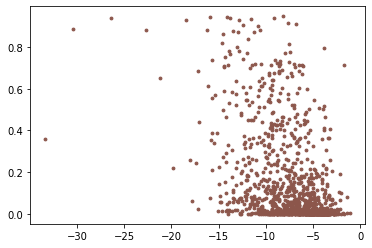

In [ ]:
plt.scatter(df['Volume'], df['Ac√∫stica'], 8, color = "C5" )
plt.show()



---



## 8. An√°lise gr√°fica das m√∫sicas por d√©cadas:

Primeiramente fa√ßa uma [breve viagem ao longo da hist√≥ria do rock](https://prezi.com/view/JOvChpwcn2Ii6ogTVAWx/) para compreender a rela√ß√£o das informa√ß√µes que obtemos a partir dos dados das m√∫sicas a seguir, com o seu momento de lan√ßamento

1. **Quantidade de m√∫sicas na playlist** por d√©cada:

In [ ]:
print('D√©cada de 50:', (df['D√©cada'] == 1950).sum())
print('D√©cada de 60:', (df['D√©cada'] == 1960).sum())
print('D√©cada de 70:', (df['D√©cada'] == 1970).sum())
print('D√©cada de 80:', (df['D√©cada'] == 1980).sum())
print('D√©cada de 90:', (df['D√©cada'] == 1990).sum())
print('Anos 2000:', (df['D√©cada'] == 2000).sum())

D√©cada de 50: 10
D√©cada de 60: 84
D√©cada de 70: 208
D√©cada de 80: 216
D√©cada de 90: 203
Anos 2000: 392


2. **Quantidade de m√∫sicas dentro dos √°lbums** por d√©cada:

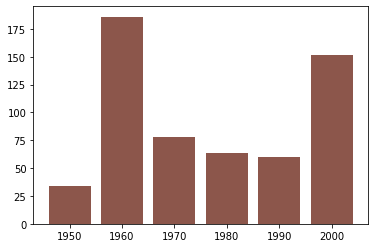

In [ ]:
plt.bar(df['D√©cada'], df['Qtd m√∫sicas no √°lbum'], 8, color = "C5" )
plt.show()

3. **Dura√ß√£o das m√∫sicas** em cada d√©cada:

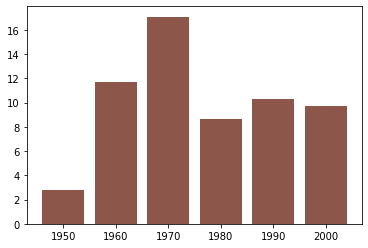

In [ ]:
plt.bar(df['D√©cada'], df['Dura√ß√£o em min'], 8, color = "C5" )
plt.show()

4. **Energia** em cada d√©cada:

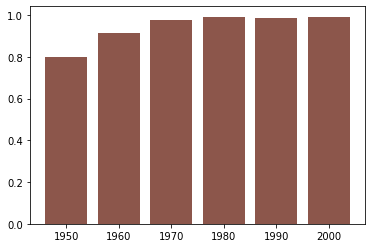

In [ ]:
plt.bar(df['D√©cada'], df['Energia'], 8, color = "C5" )
plt.show()

5. **Ao vivo** em cada d√©cada:

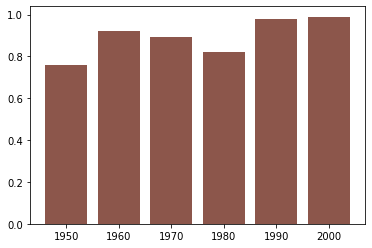

In [ ]:
plt.bar(df['D√©cada'], df['Ao vivo'], 8, color = "C5" )
plt.show()

6. **Instrumental** em cada d√©cada:

In [ ]:
plt.bar(df['D√©cada'], df['Instrumental'], 8, color = "C5" )
plt.show()

7. **Dan√ßabilidade** em cada d√©cada:

In [ ]:
plt.bar(df['D√©cada'], df['Dan√ßabilidade'], 8, color = "C5" )
plt.show()

8. **Volume** em cada d√©cada:

In [ ]:
plt.bar(df['D√©cada'], df['Volume'], 8, color = "C5" )
plt.show()



---



## 9. Observando mais detalhes:

pink floyd.jpg

1. Pink Floyd √© a banda com a m√∫sica mais curta da playlist e tamb√©m com a m√∫sica mais longa!

In [ ]:
print(df['Nome do artista'][df['Dura√ß√£o em min'] == df['Dura√ß√£o em min'].min()])
print(df['Nome do artista'][df['Dura√ß√£o em min'] == df['Dura√ß√£o em min'].max()])

130    'Pink Floyd'
Name: Nome do artista, dtype: object
793    'Pink Floyd'
Name: Nome do artista, dtype: object


Caso voc√™ queira ouvir essas m√∫sicas, segue o preview:

[Speak to me](https://p.scdn.co/mp3-preview/6443b53cb9a92f628bc9176d8bc8e2ef28298e93?cid=d8eef4d8d1d54cc1a9deb46a37c290df): 1:05

[Dogs](https://p.scdn.co/mp3-preview/88aff779b93f13abd44ce63750b7581aa41b84ad?cid=d8eef4d8d1d54cc1a9deb46a37c290df): 17:05

2. Anos das m√∫sicas mais velha e mais recente da playlist

In [ ]:
print('M√∫sica mais velha:', df['Data de lan√ßamento do √°lbum'].dt.year.min(), 'e m√∫sica mais nova:', df['Data de lan√ßamento do √°lbum'].dt.year.max())
velha = df[df['Data de lan√ßamento do √°lbum'].dt.year == 1956]
velha

M√∫sica mais velha: 1956 e m√∫sica mais nova: 2021


Nome da m√∫sica  Nome do artista          √Ålbum  \
860  Blue Suede Shoes  'Elvis Presley'  Elvis Presley   
990      Tutti Frutti  'Elvis Presley'  Elvis Presley   

    Data de lan√ßamento do √°lbum  Qtd m√∫sicas no √°lbum  Dura√ß√£o em min  \
860                  1956-03-23                    12        1.986667   
990                  1956-03-23                    12        1.959333   

     Conte√∫do expl√≠cito                                  Preview da m√∫sica  \
860               False  https://p.scdn.co/mp3-preview/b8e1ea3854aecb57...   
990               False  https://p.scdn.co/mp3-preview/a242b851d2aef3ce...   

     Energia  Ao vivo  Ac√∫stica  Instrumental  Dan√ßabilidade  Volume  D√©cada  
860    0.660    0.138     0.654      0.000002          0.557  -7.706    1950  
990    0.618    0.189     0.680      0.000000          0.635  -8.619    1950

In [ ]:
nova = df[df['Data de lan√ßamento do √°lbum'].dt.year == 2021]
nova

Nome da m√∫sica Nome do artista                          √Ålbum  \
1075  My Own Soul‚Äôs Warning   'The Killers'  Imploding The Mirage (Deluxe)   
1101        Last Train Home    'John Mayer'                Last Train Home   

     Data de lan√ßamento do √°lbum  Qtd m√∫sicas no √°lbum  Dura√ß√£o em min  \
1075                  2021-01-29                    13        4.574217   
1101                  2021-06-04                     4        3.121817   

      Conte√∫do expl√≠cito                                  Preview da m√∫sica  \
1075               False  https://p.scdn.co/mp3-preview/d1531540d35b729e...   
1101               False                                               None   

      Energia  Ao vivo  Ac√∫stica  Instrumental  Dan√ßabilidade  Volume  D√©cada  
1075    0.963   0.0820   0.00131       0.00290          0.354  -3.506    2000  
1101    0.850   0.0465   0.16800       0.00202          0.588  -6.431    2000

3. Palavras que mais aparecem no t√≠tulo das m√∫sicas:

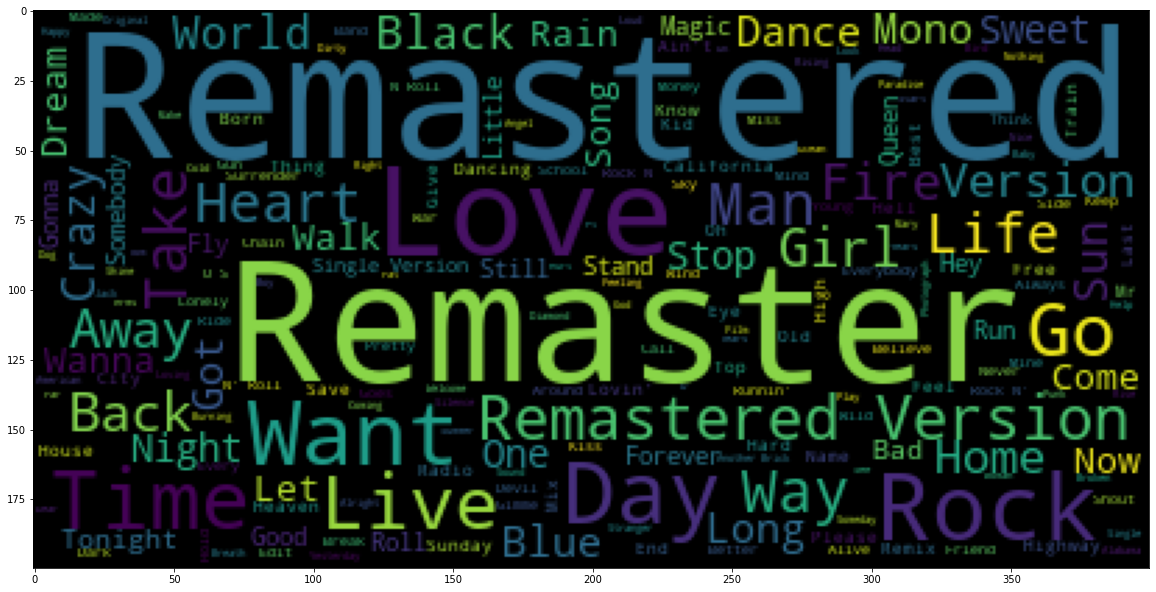

In [ ]:
lista = df['Nome da m√∫sica'].tolist()
paragrafo = " ".join(lista)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo))

Ser√° que o rock √© t√£o demon√≠aco como falam? üòÇ

4. Presen√ßa de conte√∫do expl√≠cito nas m√∫sicas:

In [ ]:
# dados
legenda = ['SIM', 'N√ÉO']
data = [(df['Conte√∫do expl√≠cito'] == True).sum(), (df['Conte√∫do expl√≠cito'] == False).sum()]

# costumiza√ß√£o do gr√°fico de pizza
explode = (0.1, 0.0)
colors = ("beige", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = legenda,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, legenda,
          title ="Conte√∫do expl√≠cito",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("M√∫sica com conte√∫do expl√≠cito")

plt.show()

5. Distribui√ß√£o do tempo de dura√ß√£o das m√∫sicas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


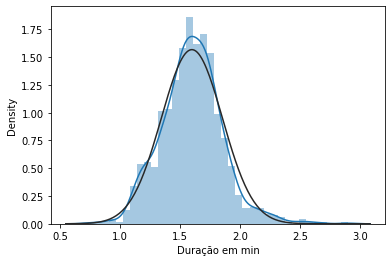

In [ ]:
df['Dura√ß√£o em min'] = np.log1p(df['Dura√ß√£o em min'])
sns.distplot(df['Dura√ß√£o em min'], fit=norm)
plt.show()

Na verdade esse gr√°fico ia longe (vimos que tem m√∫sicas de quase 20min), por isso fizemos uma normaliza√ß√£o dos dados



---



## Curiosidade: 

Voc√™s sabiam que hoje a banda **Metallica** utiliza dados do Spotify de seus ouvintes para definir a setlist de cada show que far√° em cada cidade?
[Veja a publica√ß√£o do assunto no Linkedin](https://www.linkedin.com/feed/update/urn:li:activity:6974882529556226048/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A6974882529556226048%2C6975060722330267649)&dashCommentUrn=urn%3Ali%3Afsd_comment%3A(6975060722330267649%2Curn%3Ali%3Aactivity%3A6974882529556226048))

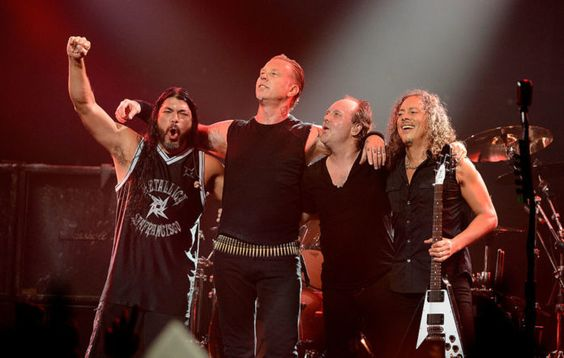



---



## Fontes:

[Hist√≥ria do Rock](https://i.pinimg.com/originals/e6/78/8f/e6788f017f9ebe77ab945f5f24be9461.jpg)

[Imagens utilizadas](https://br.pinterest.com/)

[Curiosidade](https://www.linkedin.com/feed/update/urn:li:activity:6974882529556226048/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A6974882529556226048%2C6975060722330267649)&dashCommentUrn=urn%3Ali%3Afsd_comment%3A(6975060722330267649%2Curn%3Ali%3Aactivity%3A6974882529556226048))
